In [44]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [4]:
train.shape

(87864, 9)

In [5]:
train.isna().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [6]:
test.isna().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

In [7]:
test.shape

(37656, 8)

In [8]:
data = pd.concat([train,test])

In [9]:
data

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
...,...,...,...,...,...,...,...,...,...
37651,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3,NaN
37652,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3,NaN
37653,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1,NaN
37654,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3,NaN


In [10]:
data = data.reset_index(drop = True)

In [11]:
data.shape

(125520, 9)

In [12]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_ID,125520,896,FDE11,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_W,125520.0,NaN,NaN,NaN,14.782266,4.427802,4.598804,10.465685,14.55376,19.376857,21.25
Item_Type,125520,16,Fruits and Vegetables,18775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,125520.0,NaN,NaN,NaN,149.634197,60.185944,32.910015,110.163563,143.892967,196.590199,265.214271
Outlet_ID,125520,5,OUT035,32093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Year,125520.0,NaN,NaN,NaN,1999.919328,6.710208,1987.0,1997.0,1999.0,2004.0,2009.0
Outlet_Size,125520,3,Small,62118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,125520,3,Tier 1,46397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,87864.0,NaN,NaN,NaN,1911.84212,1291.386004,-1229.360345,959.249675,1606.307877,2608.057736,10309.28331


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125520 entries, 0 to 125519
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Item_ID               125520 non-null  object 
 1   Item_W                125520 non-null  float64
 2   Item_Type             125520 non-null  object 
 3   Item_MRP              125520 non-null  float64
 4   Outlet_ID             125520 non-null  object 
 5   Outlet_Year           125520 non-null  int64  
 6   Outlet_Size           125520 non-null  object 
 7   Outlet_Location_Type  125520 non-null  object 
 8   Sales                 87864 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 8.6+ MB


In [14]:
data.corr()

,Item_W,Item_MRP,Outlet_Year,Sales
Item_W,1.000000,0.000556,0.002453,0.000615
Item_MRP,0.000556,1.000000,-0.014450,0.014813
Outlet_Year,0.002453,-0.014450,1.000000,-0.035701
Sales,0.000615,0.014813,-0.035701,1.000000


<AxesSubplot:>

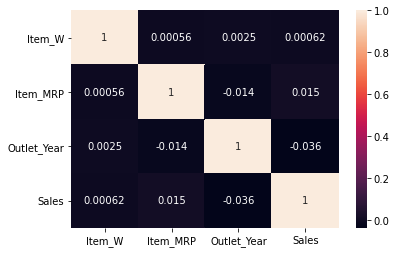

In [15]:
sns.heatmap(data.corr(), annot=True)

In [16]:
data.duplicated().sum()

0

In [17]:
data['Item_ID'].value_counts()

FDE11    603
NCE07    527
NCL18    498
FDD51    459
NCO06    450
        ... 
FDC32      3
FDI12      2
DRF60      2
FDD39      2
FDA22      2
Name: Item_ID, Length: 896, dtype: int64

In [18]:
data['Item_W'].value_counts()

13.650000    22
20.700000    22
12.500000    21
18.250000    21
12.150000    21
             ..
10.870550     1
20.248475     1
19.803545     1
10.264924     1
9.920082      1
Name: Item_W, Length: 123907, dtype: int64

In [19]:
data['Item_Type'].value_counts()

Fruits and Vegetables    18775
Baking Goods             16435
Snack Foods              14679
Household                10827
Frozen Foods              9490
Meat                      9412
Canned                    7978
Soft Drinks               7574
Dairy                     7296
Health and Hygiene        5268
Others                    4233
Breads                    3966
Hard Drinks               3721
Starchy Foods             3401
Seafood                   1274
Breakfast                 1191
Name: Item_Type, dtype: int64

C:\Users\AKSHAIYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

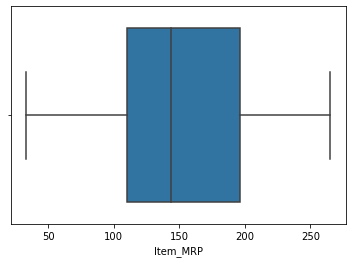

In [20]:

sns.boxplot(data['Item_MRP'])

In [21]:
data['Outlet_ID'].value_counts()

OUT035    32093
OUT046    29022
OUT018    25737
OUT013    19698
OUT049    18970
Name: Outlet_ID, dtype: int64

In [22]:
data['Outlet_Year'].value_counts()

1997    23479
2004    20921
2009    20411
1999    18436
1987    15074
1996     6690
2003     6676
2008     6206
1998     5499
1988     2076
2007       30
2005       22
Name: Outlet_Year, dtype: int64

In [23]:
data['Outlet_Size'].value_counts()

Small     62118
Medium    41919
High      21483
Name: Outlet_Size, dtype: int64

In [24]:
data['Outlet_Location_Type'].value_counts()

Tier 1    46397
Tier 3    44776
Tier 2    34347
Name: Outlet_Location_Type, dtype: int64

In [25]:
num_col = data.select_dtypes(include=np.number)

In [26]:
num_col

,Item_W,Item_MRP,Outlet_Year,Sales
0,21.027499,197.352319,2004,2689.457781
1,21.102371,148.250214,1987,3437.350375
2,20.882263,205.465010,1999,3129.967268
3,21.050435,253.417583,1996,1306.514376
4,21.247876,240.871039,1988,1739.769829
...,...,...,...,...
125515,6.380000,178.334400,2009,NaN
125516,6.650000,150.073400,2009,NaN
125517,5.655000,147.510200,1997,NaN
125518,6.675000,92.946200,2009,NaN


In [27]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns=['Item_ID','Outlet_ID'])

In [28]:
cat_col 

,Item_Type,Outlet_Size,Outlet_Location_Type
0,Baking Goods,Small,Tier 2
1,Meat,Small,Tier 1
2,Hard Drinks,Small,Tier 3
3,Starchy Foods,Small,Tier 1
4,Baking Goods,Small,Tier 3
...,...,...,...
125515,Dairy,Medium,Tier 3
125516,Canned,Medium,Tier 3
125517,Soft Drinks,Small,Tier 1
125518,Snack Foods,Medium,Tier 3


In [29]:
cat_col_processed = pd.get_dummies(cat_col)

In [30]:
cat_col_processed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
125516,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
125517,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
125518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [31]:
scale = StandardScaler()
num_col_scaled = pd.DataFrame(scale.fit_transform(num_col.drop(columns=["Item_W","Sales"])),columns=num_col.drop(columns=["Item_W","Sales"]).columns)

In [32]:
num_col_scaled

,Item_MRP,Outlet_Year
0,0.792848,0.608131
1,-0.022995,-1.925332
2,0.927642,-0.137005
3,1.724386,-0.584087
4,1.515922,-1.776305
...,...,...
125515,0.476861,1.353268
125516,0.007297,1.353268
125517,-0.035291,-0.435059
125518,-0.941885,1.353268


In [36]:
data_preprocessed = pd.concat([cat_col_processed,num_col_scaled, num_col["Sales"]],axis=1)

In [37]:
data_preprocessed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_MRP,Outlet_Year,Sales
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0.792848,0.608131,2689.457781
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,-0.022995,-1.925332,3437.350375
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0.927642,-0.137005,3129.967268
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1.724386,-0.584087,1306.514376
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1.515922,-1.776305,1739.769829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0.476861,1.353268,NaN
125516,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.007297,1.353268,NaN
125517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,-0.035291,-0.435059,NaN
125518,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,-0.941885,1.353268,NaN


In [39]:
train_preprocessed = data_prerocessed[data_prerocessed['Sales'].notna()]

In [40]:
test_preprocessed = data_prerocessed[data_prerocessed['Sales'].isna()]


In [41]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)

In [42]:
train_preprocessed.shape

(87864, 25)

In [43]:
test_preprocessed.shape

(37656, 25)